# Olympic Data Analysis with Python

## Capstone project
**By Harsha Veena**
**On 10:7:2022**

## Introduction:
Olympic data is about winners information of different athletes from different country in their sport/game and their medals i particular year.we have 8618 winners information.
            In this project, we are going to see the Olympics analysis using Python. The modern Olympic Games or Olympics are leading international sports events featuring summer and winter sports competitions in which thousands of athletes from around the world participate in a variety of competitions. The Olympic Games are considered the world’s foremost sports competition with more than 200 nations participating.
         The total number of events in the Olympics is 339 in 33 sports. And for every event there are winners. Therefore various data is generated.So, by using Python we will analyze this data.We have **10 attributes with 8618 athletes** data.

our attributes contain information like mention in following table:

|information type|attributes|
|--|--|
|personal| name, age|
|region| country|
|tenure|year|
|summary|sports,Date_Given,total_medal|
|medal|gold,silver,bronze|


**Data Description**
1. **Name** is name of athlete, which is a string, **object** datatype.
2. **age** is at which age, athlete won that, which can be continuous value, **float** datatype.
3. **year** is which year they won of olympix, they won medal, which is specific umber, disrete **int** datatype.
4. **Date_Given** on that date, they won medal, which should be in date format.
5. **sports** is in which game they playes & won, which is unique string, so **object**, but we keep in **category** to reduce memory usage.
6. **country** is from which country they represents, which is unique string or **object**, but we convert to **category** to reduce memory.
7. **gold_medal** is athlete won number of gold medals, which is **discrete** number, so **int** format.
8. **silver_medal** is the athlete won number of silver medals, which is **discrete** number, so **int** datatype.
9. **brone_medal** is the athlete won number of bronze medals, which is **discrete** number , so **int** format.
10. **total_medal** is the athlete won number of total medals, which is **discrete** number, so **int** format.

## Objective:
Our aim is to analyse given olympic data by statistically,visually and apply transformation where ever necessary and get insights from data & need to find top 10 countries with total number of medals in gold,silver,bronze .

## Data Collection:
Data was downloaded from odin school LMS portal and saved in local computer.Our data is in csv format. we need to convert to pandas to analyze. so first we need to install pandas which is library to analyse data in python. we need to import nummPy, which is library to do mathematical calculations.


In [1]:
# import required libraries
import numpy as np
import pandas as pd

## Read data in pandas

In [2]:
# read csv file into pandas dataframe
df = pd.read_csv("C:/Users/Hp/Documents/datasets/olympix_data_organized_with_header (1) (1).csv")

## Exploration of Data

In [3]:
df.head()  # display top 5 rows

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,2008,8/24/2008,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,8/29/2004,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,08-12-2012,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,8/24/2008,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,10-01-2000,Gymnastics,2,1,3,6


In [4]:
df.tail()  # display botom 5 rows

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
8613,Olena Sadovnycha,32.0,Ukraine,2000,10-01-2000,Archery,0,1,0,1
8614,Kateryna Serdiuk,17.0,Ukraine,2000,10-01-2000,Archery,0,1,0,1
8615,Wietse van Alten,21.0,Netherlands,2000,10-01-2000,Archery,0,0,1,1
8616,Sandra Wagner-Sachse,31.0,Germany,2000,10-01-2000,Archery,0,0,1,1
8617,Rod White,23.0,United States,2000,10-01-2000,Archery,0,0,1,1


In [5]:
df.columns # display list of columns

Index(['name', 'age', 'country', 'year', 'Date_Given', 'sports', 'gold_medal',
       'silver_medal', 'brone_medal', 'total_medal'],
      dtype='object')

In [6]:
df.shape # diaplay number of rows & columns

(8618, 10)

we have 8618 rows with 10 columns. we may have duplicates in data. so we need to find number of duplicates & remove it.

In [7]:
df.duplicated().sum()  # count duplicate values in dataframe

3

we have 3 duplicates,duplicates intoduce bias in analysis & gives slight error. so we will drop them.

In [8]:
df.drop_duplicates(inplace=True)  # drop duplicates in data
df.shape   # after dropping duplicates, verify count of rows & columns

(8615, 10)

After dropping duplicates, we have 8615 rows & 10 columns, our data may contain missing values. we have to deal them.

In [9]:
df.isnull().sum()  # count of null values present

name            2
age             2
country         0
year            0
Date_Given      0
sports          0
gold_medal      0
silver_medal    0
brone_medal     0
total_medal     0
dtype: int64

we have 2 rows of name, 2 rows of column contain null values, as it is very less quantity,it will not affect data by dropping them, first let us see the rows contain null values.

In [10]:
nan_rows = df [df.isna ().any (axis=1)]  # on which rows nul value presents

In [11]:
nan_rows  # display of null value contain rows

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
1428,NaN,NaN,Brazil,2012,08-12-2012,Volleyball,0,1,0,1
4485,NaN,NaN,Argentina,2012,08-12-2012,Hockey,0,1,0,1


As null values in same year, for silver medal, but for different sports and different country, so if we remove also , it didnt effect our data. as we have to find count of medals by country, it didt make much difference, but we will try to fill name and age coumns . as age is numerical , we calculate its skewness value to check it is symmetric or skewed.if it is symmetric data we can fill by mean, if it is skewed data, we fill by median. as name is object & treat like categorical value, for categorical value, we will fill by mode.

In [12]:
df['name'].mode()   # most frequent name in column

0           Anky van Grunsven
1              Artur Taymazov
2                 Ben Ainslie
3             Bradley Wiggins
4                Brenda Villa
5                   Chris Hoy
6     Christie Pearce-Rampone
7              Emilie Heymans
8              Eskild Ebbesen
9               Heather Petri
10                Jason Lezak
11             Katalin Kovács
12         Katherine Grainger
13     Katrin Wagner-Augustin
14                  Kim Rhode
15            Kristi Harrower
16             Lauren Jackson
17               Leisel Jones
18                Lucha Aymar
19                 Matt Wells
20            Michal Martikán
21         Pavol Hochschorner
22         Peter Hochschorner
23             Robert Scheidt
24           Sergey Tetyukhin
25          Valentina Vezzali
26    Veronica Campbell-Brown
27                   Wang Hao
28                   Yang Wei
dtype: object

In [18]:
df['age'].mode()  # most frequent age

0    24.0
dtype: float64

In [13]:
df['age'].value_counts()  # how many times same age repeats

24.0    717
26.0    705
23.0    691
25.0    683
27.0    658
28.0    651
22.0    644
29.0    526
21.0    458
30.0    452
31.0    352
20.0    329
32.0    309
19.0    222
33.0    217
34.0    179
35.0    130
18.0    129
36.0    111
17.0     76
16.0     60
37.0     53
38.0     51
39.0     40
40.0     31
42.0     20
43.0     18
15.0     18
41.0     18
44.0     15
46.0     15
45.0     13
47.0      6
49.0      4
51.0      3
52.0      2
50.0      2
54.0      1
56.0      1
55.0      1
61.0      1
48.0      1
Name: age, dtype: int64

In [15]:
# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

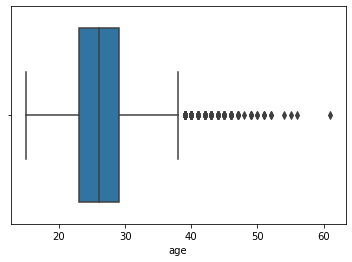

In [16]:
sns.boxplot(df['age'])   # To check outliers & distribution of data

Here it shows outliers between 40-60. but in real life athletes wn medals in that age also, so we need not worry about it.Here median lies around 25 & quRtiles lie between ~22 -~30, which means most athletes are in this age range only.As plot shows symmetric with outliers, it may be slightly skewed toward right. we plot hdst plot for more clarity

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

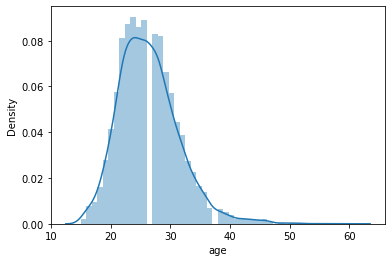

In [17]:
sns.distplot(df['age'])  # examin distribution

This plot shows data distribution is slightly skewed. most of data lies around 15 to 40 age range.Let us calculate skewness value for exact value.

In [18]:
df['age'].skew()  # to examine distribution

0.8590070668484233

As it is skewed data towards right. and also skew value is >0.5. so it is moderately skewed. we have to replace missing values with its median. 

In [19]:
df['age'].median()  # medain of age

26.0

But this data contain information of different years, so we will find median of age in null value row year which is 2012. so we need to group data by year and calulate medain of age in particular year.

In [20]:
df_ay = df['age'].groupby(df['year'])
# group by year, because our daat contains different years info

In [21]:
df_ay.median()  # median of age according to years

year
2000    26.0
2002    27.0
2004    26.0
2006    28.0
2008    26.0
2010    26.0
2012    26.0
Name: age, dtype: float64

we have missing values in 2012. so we will replace its value with 26

In [22]:
df['age'] = df['age'].fillna(26)  # filling null value with medain of age in year 2012(which is null value year)

In [23]:
df['age'].isna().sum() # verify count of nulls after filling with medain

0

As it is skewed data, we have o apply transformation

|skew| Moderate|High| Higher| Extreme|
|---|---|---|---|----|
|positive/right tail|square root transformation| log| log base 10| Inverse
|negative/;eft tail| reflect then square root| reflect then log|reflect then log base 10| reflect then inverse

Here we have value of 0.8 , which means moderately positive skewed. se we use square root tramsformation.


In [24]:
df['age']=np.sqrt(df['age'])  # applying tranformation 

In [25]:
df['age'].skew()  # check skewness value after transformation

0.48991777592813834

Now, it became approximately symmetric after square root tranformation

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

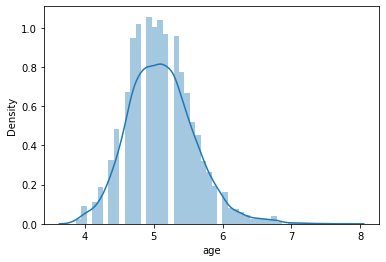

In [26]:
sns.distplot(df['age'])  # after transformation, examine distribution of age data

Now it is converted to symmetric data after transforming.

In [27]:
df['name'].value_counts()  # how many times each time replats

Matt Wells          4
Jason Lezak         4
Sergey Tetyukhin    4
Leisel Jones        4
Artur Taymazov      4
                   ..
Melanie Kok         1
Jin Ziwei           1
Michal Jelinski     1
Josh Inman          1
Rod White           1
Name: name, Length: 6955, dtype: int64

In [28]:
df[df['sports']=='Volleyball']  # for volleyball, we have null value, so lets check daat to replace

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
1428,NaN,5.099020,Brazil,2012,08-12-2012,Volleyball,0,1,0,1
1431,Foluke Akinradewo,4.898979,United States,2012,08-12-2012,Volleyball,0,1,0,1
1432,Thiago Alves,5.099020,Brazil,2012,08-12-2012,Volleyball,0,1,0,1
1433,Nikolay Apalikov,5.385165,Russia,2012,08-12-2012,Volleyball,1,0,0,1
1434,Erika Araki,5.196152,Japan,2012,08-12-2012,Volleyball,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
1704,Virna,5.385165,Brazil,2000,10-01-2000,Volleyball,0,0,1,1
1705,Goran Vujevic,5.196152,Serbia and Montenegro,2000,10-01-2000,Volleyball,1,0,0,1
1706,Igor Vušurovic,5.000000,Serbia and Montenegro,2000,10-01-2000,Volleyball,1,0,0,1
1707,Walewska,4.582576,Brazil,2000,10-01-2000,Volleyball,0,0,1,1


for name column,we have same in 1428 row & 1432 , so we can replace name. but if we do that it will become duplicate, again we have to drop. and also we have to find number of medals won by country, here we do by coutry not by name, so we can drop them.

In [29]:
df = df.dropna()  # when null values less than 0.5% of data, we can drop them
df.isnull().sum()  # verify count of null values after dropping

name            0
age             0
country         0
year            0
Date_Given      0
sports          0
gold_medal      0
silver_medal    0
brone_medal     0
total_medal     0
dtype: int64

after dropping null values of name column, let check shape of data

In [30]:
df.shape  # verify count of rows after droping null values

(8613, 10)

we have 8613 rows without null & duplicates

In [31]:
df.info()  # display datatypes of how python reading

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8613 entries, 0 to 8617
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          8613 non-null   object 
 1   age           8613 non-null   float64
 2   country       8613 non-null   object 
 3   year          8613 non-null   int64  
 4   Date_Given    8613 non-null   object 
 5   sports        8613 non-null   object 
 6   gold_medal    8613 non-null   int64  
 7   silver_medal  8613 non-null   int64  
 8   brone_medal   8613 non-null   int64  
 9   total_medal   8613 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 740.2+ KB


Date_Given should be in date format, country, sports can convert to category, so we can reduce its memory usage.

In [32]:
# import date library to typecast of date_Given column
from datetime import datetime as dt
df['Date_Given'] =  pd.to_datetime(df['Date_Given'], infer_datetime_format=True) 


In [33]:
df[['country','sports','year']] = df[['country','sports','year']].astype('category') # convert to category,

In [34]:
df.dtypes  # display datatypes of columns after typrcast

name                    object
age                    float64
country               category
year                  category
Date_Given      datetime64[ns]
sports                category
gold_medal               int64
silver_medal             int64
brone_medal              int64
total_medal              int64
dtype: object

In [39]:
df.head()  # display top 5 rows afer clean & type conversion

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,2008,2008-08-24,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,2004-08-29,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,2012-08-12,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,2008-08-24,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,2000-10-01,Gymnastics,2,1,3,6


In [49]:
df['name'].value_counts()

Matt Wells          4
Jason Lezak         4
Sergey Tetyukhin    4
Leisel Jones        4
Artur Taymazov      4
                   ..
Melanie Kok         1
Jin Ziwei           1
Michal Jelinski     1
Josh Inman          1
Rod White           1
Name: name, Length: 6955, dtype: int64

In [61]:
import re  # library for string 

In [62]:
def strip_character(dataCol):
    r = re.compile(r'[^a-zA-Z !@#$%&*_+-=|\:";<>,./()[\]{}\']')
    return r.sub('', dataCol)


In [63]:
df['name'] = df['name'].apply(strip_character)
df['name'].head(20)

0            Michael Phelps
1            Michael Phelps
2            Michael Phelps
3          Natalie Coughlin
4             Aleksey Nemov
5             Alicia Coutts
6            Missy Franklin
7               Ryan Lochte
8           Allison Schmitt
9          Natalie Coughlin
10               Ian Thorpe
11              Dara Torres
12            Cindy Klassen
13            Nastia Liukin
14             Marit Bjrgen
15                 Sun Yang
16          Kirsty Coventry
17    Libby Lenton-Trickett
18              Ryan Lochte
19           Inge de Bruijn
Name: name, dtype: object

Now all special charecters are removed.

Now we have colmplete clean data.
# Statistical  analysis


 we have category and numerical data. 
* we can apply describe function for numerical data. for categorical data we use mode for calculating statistical measures.
* statistical measures are **measure of central tendency** and **measure of central dispersion**.
* **measure of central tendency** are **mean ,median,mode**.
* **measure of central dispersion** are **std,IQR,Variance,skewness**.
* For **symmetrical** data **measure of central tendency is mean** and **measure of central dispersion is sd.
* For **Unsymmeric data**, **measure of central tandency is median** and **measure of central dispersion is IQR**,because it is not affected by outliers.
* For **categorical** data **measure of central tendency is mode** & measure of cenral dispersion is not there,because these are only few categories, we cant find spread of data.

In [35]:
df.describe()  # calculate statistical measures for all numerical columns

,age,gold_medal,silver_medal,brone_medal,total_medal
count,8613.000000,8613.000000,8613.000000,8613.000000,8613.000000
mean,5.115589,0.364914,0.362940,0.377917,1.105770
std,0.486011,0.545436,0.511531,0.505069,0.409003
min,3.872983,0.000000,0.000000,0.000000,1.000000
25%,4.795832,0.000000,0.000000,0.000000,1.000000
50%,5.099020,0.000000,0.000000,0.000000,1.000000
75%,5.385165,1.000000,1.000000,1.000000,1.000000
max,7.810250,8.000000,3.000000,3.000000,8.000000


We got count, mean, standard deviation, minimun , 25percentile,50 percentile, 75th percentile & maxilum value of numerical columns.

# measures of central tendency
mean, median. mode
mean value obtain from above describe function

In [36]:
df.median()  # median value of numerical columns

C:\Users\Hp\AppData\Local\Temp/ipykernel_2836/2081304913.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.median()  # median value of numerical columns
C:\Users\Hp\AppData\Local\Temp/ipykernel_2836/2081304913.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()  # median value of numerical columns


age             5.09902
gold_medal      0.00000
silver_medal    0.00000
brone_medal     0.00000
total_medal     1.00000
dtype: float64

In [37]:
df.mode() # mode for both categorical & numerical columns

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Anky van Grunsven,4.898979,United States,2008,2008-08-24,Athletics,0.0,0.0,0.0,1.0
1,Artur Taymazov,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2,Ben Ainslie,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
3,Bradley Wiggins,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
4,Brenda Villa,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
5,Chris Hoy,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
6,Christie Pearce-Rampone,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
7,Emilie Heymans,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
8,Eskild Ebbesen,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
9,Heather Petri,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


# measures of central dispersion
var,std,IQR,skewness

In [38]:
df.var()  # variance of numerical columns

C:\Users\Hp\AppData\Local\Temp/ipykernel_2836/1348498134.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()  # variance of numerical columns


age             0.236207
gold_medal      0.297501
silver_medal    0.261664
brone_medal     0.255095
total_medal     0.167283
dtype: float64

IQR can be calculated by 75%-25%. for numerical columns we calcuted iqr.for unsymmetric data measure of central dispersion is IQR.if any null values are there, we will replace it by it.

In [39]:
df.dtypes

name                    object
age                    float64
country               category
year                  category
Date_Given      datetime64[ns]
sports                category
gold_medal               int64
silver_medal             int64
brone_medal              int64
total_medal              int64
dtype: object

In [40]:
# IQR=75%-25%
iQR=[]
for col in df:
    if df[col].dtype == 'float64'or df[col].dtype == 'int64':
        (q3,q1)=np.percentile(df[col],[75,25])
        print(col,'iQR',q3-q1)


age iQR 0.5893332838217846
gold_medal iQR 1.0
silver_medal iQR 1.0
brone_medal iQR 1.0
total_medal iQR 0.0


std is standard deviation, whch is square root of variance. sd or std will have same unit with mean.for symmetric data measure of central dispersion is sd.if any missing values present , we will replace it with it.It is calcluted for numerical values. when we use describe function also. we get sd for numerical columns.

In [41]:
df.std()  # standard deviation of numerical columns

C:\Users\Hp\AppData\Local\Temp/ipykernel_2836/2027750418.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()  # standard deviation of numerical columns


age                                 0.486011
Date_Given      1552 days 00:19:01.380717312
gold_medal                          0.545436
silver_medal                        0.511531
brone_medal                         0.505069
total_medal                         0.409003
dtype: object

skew function is for finding skewness value.it is usefull to differentiate data as symmetric & unsymmetric.If skewness value is in between 0.5 to -0.5 then it is considered as approximately symmetric data.If it is between +/- 0.5 to +/- 1 then it is moderately skewed data. if it is more than that it is fully skewed data. if values are +,then it is positively skewed/right skewed data.it values ae - ,then it is negatively skewed or left skewed data.

|distribution|skew value|
|---|---|
|symmetric|0|
|approx symmetric| 0to +-0.5|
moderately skewed| +-0.5 to +-1|
fully skewed| +-1 above|

In [42]:
df.skew()  # to examine distribution of numerical columns

C:\Users\Hp\AppData\Local\Temp/ipykernel_2836/245788020.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()  # to examine distribution of numerical columns


age             0.489837
gold_medal      1.638839
silver_medal    0.955039
brone_medal     0.762090
total_medal     5.580939
dtype: float64

Here age skewness value is greater than 0.5 , so it is moderately skewed. gold medal is skewed. silver and bronze are moderately skewed. total medal is fully skewed.

# Exploratory Data Analysis with code & Plots

In [49]:
df['gold_medal'].value_counts()

0    5689
1    2745
2     150
3      24
4       3
8       1
6       1
Name: gold_medal, dtype: int64

most of the athletes didnt won gold medal. 2745 athletes won 1 medal, 150 athletes won 2 medals, 24 athletes won 3 medals, 3 athelets won 4 medals, 1 number of athete won 8,6 medals.

Text(0.5, 1.0, 'trend of medals')

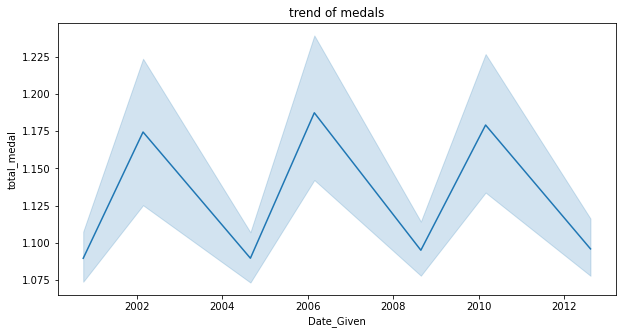

In [46]:
plt.figure(figsize=(10,5))  # for bigger size of plot
sns.lineplot(x = df['Date_Given'],y=df['total_medal']) # syntax for count plot
plt.title('trend of medals')

In 2002,2006,2010 medals are increasing trend.in 2004,2008 it shows decresing trend.

Lets examine gold medals per country, as column are category & numerical, we can use barplot.

Text(0, 0.5, 'count of gold medals won')

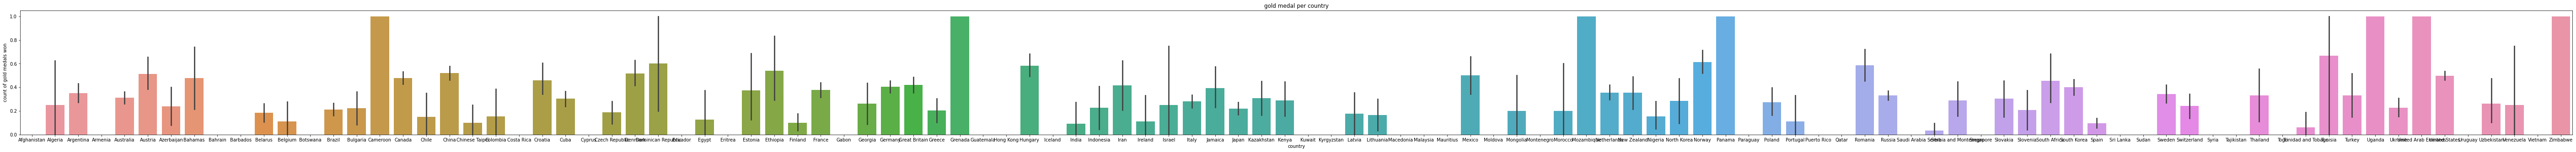

In [70]:
plt.figure(figsize=(100,5))
sns.barplot(x='country',y='gold_medal',data=df)
plt.title('gold medal per country')
plt.xlabel("country")
plt.ylabel('count of gold medals won')

From plot we notice **United States** got more gold medals. uganda, zimbabwe also got more

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Variation of Age over time')

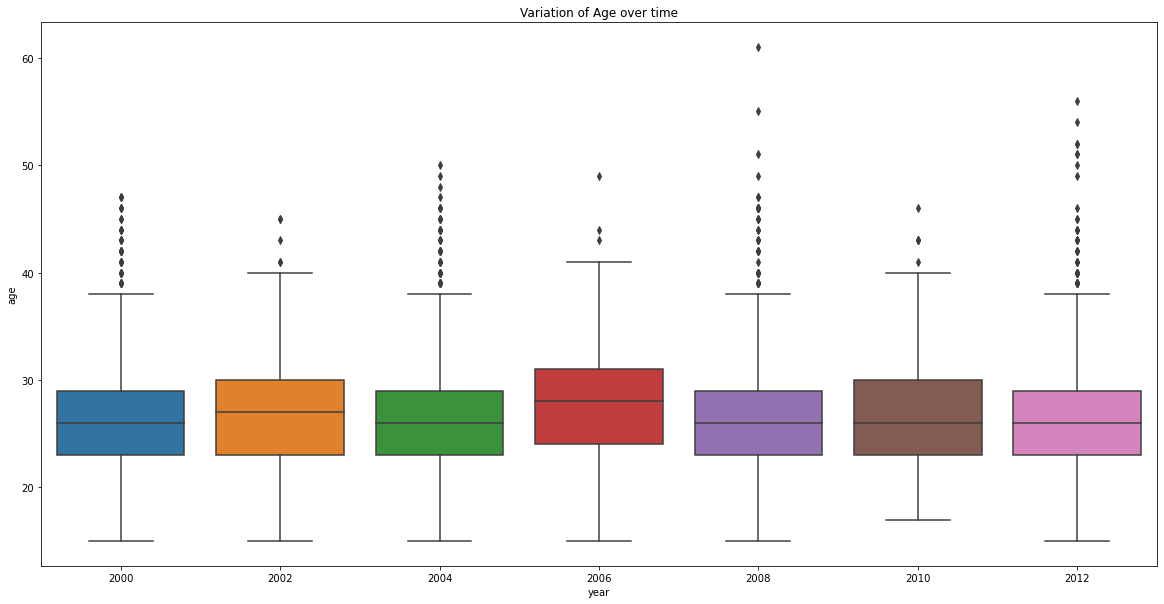

In [71]:
plt.figure(figsize=(20, 10))
sns.boxplot('year', 'age', data=df)
plt.title('Variation of Age over time')

when we notice year and their respective age distribution. all years age mostly lies between 20-30 and medium lies around 25. maximum age around 40. all years showing outliers, but in real time , some athletes played & won in more age around 60. so we dont need to worry about outliers.

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'count of gold_medals ')

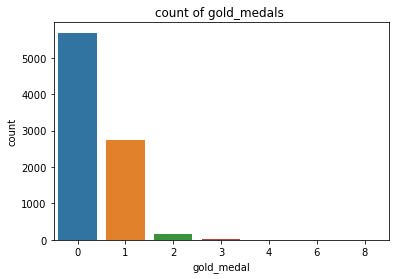

In [80]:

sns.countplot('gold_medal', data=df)
plt.title('count of gold_medals ')

From above plot we can say, most of atletes didint won gold medal. around 2500 athletes won gold medal 1 time.

# Please list the top 10 countries with the gold medal, then the top10 countries with the silver medal, then the bronze medal and the total medal.

In [74]:
df1 = df['gold_medal'].groupby(df['country']).sum().sort_values(ascending=False)
df1.head(10)

country
United States    552
Russia           234
China            234
Germany          223
Canada           168
Australia        163
Great Britain    124
South Korea      110
France           108
Netherlands      101
Name: gold_medal, dtype: int64

In [106]:
df2 = df['brone_medal'].groupby(df['country']).sum().sort_values(ascending=False)
df2.head(10)

country
United States    320
Russia           313
Germany          223
Australia        220
Italy            142
China            140
Japan            113
South Korea      105
Canada           104
France           103
Name: brone_medal, dtype: int64

In [105]:
df3 = df['silver_medal'].groupby(df['country']).sum().sort_values(ascending=False)
df3.head(10)

country
United States    440
Australia        226
Russia           221
Germany          183
China            156
Netherlands      135
Spain            116
Japan            112
France           107
Italy            103
Name: silver_medal, dtype: int64

In [104]:
df3 = df['total_medal'].groupby(df['country']).sum().sort_values(ascending=False)
df3.head(10)

country
United States    1312
Russia            768
Germany           629
Australia         609
China             530
Canada            370
Italy             331
Great Britain     322
France            318
Netherlands       318
Name: total_medal, dtype: int64

United states is the top country in all gold,silver,bronze medals.

United states is the country having highest number of medals of 1312.

|country with gold medal|  country silver medal| country Bronze medal|total medal
|----|----|----|--|
United States   552|United States    440|United States    320|United States    1312
Russia           234|Australia        226|Russia           313|Russia            768
China            234|Russia           221|Germany          223|Germany           629
Germany         223|Germany          183|Australia        220|Australia         609
Canada           168|China            156|Italy            142|China             530
Australia        163|Netherlands      135|China            140|Canada            370
Great Britain    124|Spain            116|Japan            113|Italy             331
South Korea      110|Japan            112|South Korea      105|Great Britain     322
France           108|France           107|Canada           104|France            318
Netherlands      101|Italy            103|France           103|Netherlands       318

In [109]:
df4 = df['total_medal'].groupby(df['sports']).sum().sort_values(ascending=False)
df4.head(10)

sports
Swimming      765
Athletics     753
Rowing        576
Football      407
Hockey        386
Ice Hockey    384
Handball      351
Canoeing      333
Waterpolo     306
Cycling       306
Name: total_medal, dtype: int64

Swimming is the sport having highest number of total medals of 765.After that athletics got more medals.

In [111]:
df4 = df['total_medal'].groupby(df['year']).sum().sort_values(ascending=False)
df4.head(10)

year
2008    2050
2000    2005
2004    2004
2012    1941
2006     526
2010     520
2002     478
Name: total_medal, dtype: int64

In 2008, 2050 medals won by athlets which is highest.

In [112]:
df5 = df['gold_medal'].groupby(df['age']).sum().sort_values(ascending=False)
df5.head(10)

age
24.0    285
25.0    261
26.0    251
23.0    249
28.0    238
22.0    227
27.0    223
29.0    184
21.0    158
30.0    149
Name: gold_medal, dtype: int64

At age of 24, athlets won more medals of 285.

In [113]:
df6 = df['total_medal'].groupby(df['name']).sum().sort_values(ascending=False)
df6.head(10)

name
Michael Phelps         22
Natalie Coughlin       12
Ryan Lochte            11
Ole Einar Bjrndalen     9
Leisel Jones            9
Ian Thorpe              9
Inge de Bruijn          8
Katalin Kovcs           8
Apolo Anton Ohno        8
Jason Lezak             8
Name: total_medal, dtype: int64

Michael Phelps is the athelete who won highest number of medals of  22.

# Conclusion:
We read data into pandas dataaframe. we did basic exploration of data. we clean data by handling duplicates, missing values, special charecters. we transform data of age to reudce its skewness. we perform statistical analysis on cleaned data by calculating measures of central tendency & dispersion.we perform Exploratory Data analysis by analysing gold medals per country, sorting top countries with their number of gold,bronze & silver medals.Us is the country having highest number of medals in total &  also all categories. Michael Phelps won more medals. at age 24 athlete won more medals. in 2008 more medals are won. In swimming, we have more medals. 

**Author**: Harsha Veena

**Created on** : 10:7:2022

**Language**: Python

**IDE**: Jupyter Notebook from Anaconda

**Libraries**: numpy, pandas, seaborn, matplotlib.pyplot, re

**Functions**: read_csv, head(), tail(),info(),shape,columns, duplicated(), sum(), drop(), isnull(), dropna(), fllna(), apply, groupby, count,sort_values(), ascending, describe(), median(), mode(), var(), std(), skew(), np.percentile(),np.sqrt()

**purpose**: Capstone project on data analysis of Olympics data

**code Reference on github** : https://github.com/Harshaveenakondeti/


